# 5.3 Training Error

In the previous sections, we learned to build regression models. In this section, we will learn one way to evaluate the quality of a regression model: the training error. We will also discuss the shortcomings of using training error to measure the quality of a regression model.

## Documentation

* ScikitLearn compose: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose

* ScikitLearn StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

* ScikitLearn OneHotEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html



In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt

pd.options.display.max_rows = 5

housing_df = pd.read_csv("https://raw.githubusercontent.com/dlsun/data-science-book/master/data/AmesHousing.txt",
                         sep="\t")
housing_df

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
...       ...     ...     ...       ...             ...        ...  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

Let's replicate our regression work from the last two notebooks on a simple example of predicting the sale price based on the square footage of the house.


In [3]:
housing_df[["Gr Liv Area", "SalePrice"]]

Gr Liv Area  SalePrice
0            1656     215000
1             896     105000
...           ...        ...
2928         1389     170000
2929         2000     188000

[2930 rows x 2 columns]

In [5]:
xt = housing_df["Gr Liv Area"]      ## our independent variable data

yt = housing_df["SalePrice"]        # our dependent variable data
 
linearModel = LinearRegression()    # linear regression model
knnModel = KNeighborsRegressor(n_neighbors=30)   ## KNN model

### From Alex
### note:  np.array([xt]).T creates a 2D numPy array representing a column of values - the expected format of the input for the first parameter of fit()
###        note that in this example, I am staying away from using pandas data types, and instead am operating with NumPy data. 
###        this is typically my preference, when working with scikit-learn machine learning models.
### 

linearModel.fit(np.array([xt]).T,yt)    ## fit linear regression
knnModel.fit(np.array([xt]).T,yt)       ## fit KNN

lineX = np.array([np.arange(0,6000, step=1)]).T   ## create the list of data points [0,1,2,3,..,6000] over which we will plot predictions of each of the two methods

linearY = linearModel.predict(lineX)  ## get linear regression predictions
knnY = knnModel.predict(lineX)        ## get KNN predictions

In [23]:
linearY, knnY

(array([ 13289.63436476,  13401.32836562,  13513.02236648, ...,
        683118.55750899, 683230.25150985, 683341.9455107 ]),
 array([ 72010.36666667,  72010.36666667,  72010.36666667, ...,
        372458.46666667, 372458.46666667, 372458.46666667]))

array([243714.3581344])

Let's draw our regression lines against the scatter plot

(152809.580146099, 149385.03333333333, 360000)

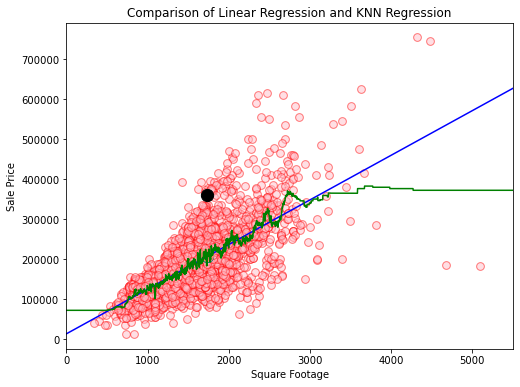

In [47]:

idx = 434

x = np.array([[xt[idx]]])

yReal = yt[idx]

yl = linearModel.predict(x)
yknn = knnModel.predict(x)

f = plt.figure(figsize=(8,6))

plt.title("Comparison of Linear Regression and KNN Regression")
plt.xlabel("Square Footage")
plt.ylabel("Sale Price")
plt.xlim(0,5500)
plt.scatter(xt,yt, s=60, alpha=0.5, c="pink", edgecolors="red")
plt.plot(lineX, linearY, c="blue")
plt.plot(lineX,knnY, c="green")
plt.scatter(x, yl, s=150, color="teal", alpha=1)
plt.scatter(x, yknn, s=150, color ="salmon", alpha=1)
plt.scatter(x, [yReal], s=150, color = "black")

f.show()

np.abs(yReal-yl[0]), np.abs(yReal-yknn[0]), yReal




Our **ultimate** goal is to determine the answers to the following questions:

1. Given a predictor, how well is it performing? Is it a good predictor?
    * specifically, we want to understand how to answer this question for regression tasks 
    * we will address other machine learning tasks (classification) later
2. Given two predictors, which one is better?

3. How to find the best predictor?

To answer the first question, we need to **measure** the quality of predictions.

To answer the second question, we need to do an **apples-to-apples comparison** of the prediction quality measures we collected.

Our discussion of **measurements of quality of predictions** (otherwise known as **performance metrics**) will take place in two stages.

1. First, we define the peroformance metrics we want to collect, and use the data available to us (training data) to measure those metrics (this notebook)

2. Next, we **improve** on our ability to measure the performance of regression models (and - in fact - other predictors as well). This improvement  makes the measurement process more sophisticated, but lets us, in exchange, make better judgements about the quality of predictions of individual models.




# Performance Metrics for Regression Models

To evaluate the performance of a regression model, we compare the predicted labels from the model against the true labels. Since the labels are quantitative, it makes sense to look at the difference between each predicted label $\hat y_i$ and the true label $y_i$. 

One way to make sense of these differences is to square each difference and average the squared differences. This measure of error is known as **mean squared error** (or **MSE**, for short):

$$ 
\begin{align*}
\textrm{MSE} &= \textrm{mean of } (y - \hat y)^2.
\end{align*}
$$ 

MSE is difficult to interpret because its units are the square of the units of $y$. To make MSE more interpretable, it is common to take the _square root_ of the MSE to obtain the **root mean squared error** (or RMSE, for short):

$$ 
\begin{align*}
\textrm{RMSE} &= \sqrt{\textrm{MSE}}.
\end{align*}
$$ 

The RMSE measures how off a "typical" prediction is. Notice that the reasoning above is exactly the same reasoning that we used in Chapter 1 when we defined the variance and the standard deviation.

Another common measure of error is the **mean absolute error** (or **MAE**, for short):

$$ 
\begin{align*}
\textrm{MAE} &= \textrm{mean of } |y - \hat y|.
\end{align*}
$$ 

Like the RMSE, the MAE measures how off a "typical" prediction is. There are other metrics that can be used to measure the quality of a regression model, but these are the most common ones.

# Training Error

To calculate the MSE, RMSE, or MAE, we need data where the true labels are known. Where do we find such data? One natural source of labeled data is the training data, since we needed the true labels to be able to train a model.

For a $k$-nearest neighbors model, the training data is the data from which the $k$-nearest neighbors are selected. So to calculate the training RMSE, we do the following:

For each observation in the training data:
1. Find its $k$-nearest neighbors in the training data.
2. Average the labels of the $k$-nearest neighbors to obtain the predicted label.
3. Subtract the predicted label from the true label.

At this point, we can average the square of these differences to obtain the MSE or average their absolute values to obtain the MAE.



As a starting point, let's calculate training MSE for our two predictors above.

In [48]:
xt

0       1656
1        896
        ... 
2928    1389
2929    2000
Name: Gr Liv Area, Length: 2930, dtype: int64

In [51]:
### linear prediction errors

yhat = linearModel.predict(np.array([xt]).T)
linearErrors = yt - yhat
#linearErrors

### KNN prediction errors

knnPredictions = knnModel.predict(np.array([xt]).T)
knnErrors = yt-knnPredictions
knnErrors

0       18683.366667
1      -13835.000000
            ...     
2928    11476.666667
2929   -40159.666667
Name: SalePrice, Length: 2930, dtype: float64

In [52]:
##MSE Computations

linearMSE = (linearErrors**2).mean()  
knnMSE =    (knnErrors**2).mean()

linearMSE, knnMSE, linearMSE - knnMSE


(3192801087.3860373, 3024311248.5347104, 168489838.85132694)

The Root Mean Squared Error (RMSE):

In [72]:
linearRMSE = np.sqrt(linearMSE)
knnRMSE = np.sqrt(knnMSE)
np.sqrt(linearMSE), np.sqrt(knnMSE),np.sqrt(linearMSE)- np.sqrt(knnMSE)


(56504.87666906315, 54993.73826659459, 1511.1384024685613)

In [56]:
linearMAE = linearErrors.abs().mean()
knnMAE = knnErrors.abs().mean()

linearMAE, knnMAE, linearMAE-knnMAE,  pd.Series((yhat - knnPredictions)).abs().mean()

(38535.485692037604, 37895.01112627989, 640.474565757715, 7890.805229576126)

Seems like KNN (for K=30) gives a somewhat better prediction than linear regression.

## More Complex Example


Let's calculate the training MSE for a 10-nearest neighbors model for house price using a subset of features from the Ames housing data set.

In [77]:
features = ["Lot Area", "Gr Liv Area",
            "Full Bath", "Half Bath",
            "Bedroom AbvGr", 
            "Year Built", "Yr Sold",
            "Neighborhood", "Bldg Type"]

In [58]:
housing_df[features]

Lot Area  Gr Liv Area  Full Bath  Half Bath  Bedroom AbvGr  Year Built  \
0        31770         1656          1          0              3        1960   
1        11622          896          1          0              2        1961   
...        ...          ...        ...        ...            ...         ...   
2928     10010         1389          1          0              2        1974   
2929      9627         2000          2          1              3        1993   

      Yr Sold Neighborhood Bldg Type  
0        2010        NAmes      1Fam  
1        2010        NAmes      1Fam  
...       ...          ...       ...  
2928     2006      Mitchel      1Fam  
2929     2006      Mitchel      1Fam  

[2930 rows x 9 columns]

First, we will use _scikit-learn_ to preprocess the features...

We have two categorical features here: *Neighborhood* and *Bldg Type*. They need to be one-hot-encoded (dummified)

We also want to standardize our data **after we dummified** the categorical features


<AxesSubplot:xlabel='Neighborhood'>

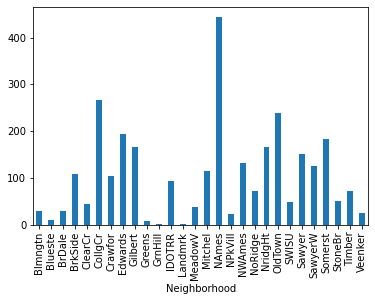

In [78]:
housing_df.groupby("Neighborhood")["Order"].count().plot.bar()

In [53]:
housing_df["Neighborhood"].unique(), housing_df["Bldg Type"].unique()

(array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
        'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
        'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
        'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
        'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object),
 array(['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon'], dtype=object))

Note: one-hot-encoding will create **a lot** of new variables.  Let's not be afraid of that. Scikit-learn can do this in a straightforward way.  (note also, that we opt for scikit-learn's functionality here over the `pandas` `get_dummies()` method... Just another illustration of redundancies in functionality between different Python packages. While we use data frames in the example below, the use of scikit-learn's `OneHotEncoder` is more universal, as it can work with data represented as `numpy` arrays as well.

In [79]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# dummy encode all the categorical features
encoder = make_column_transformer(
    (OneHotEncoder(sparse=False), ["Neighborhood", "Bldg Type"]),
    remainder="passthrough"
)
encoder.fit(housing_df[features])

X_train = encoder.transform(housing_df[features])
y_train = housing_df["SalePrice"]

# scale the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

One thing we **do lose** is variable names.  But at the moment, we don't care.

In [80]:
pd.DataFrame(X_train_sc)

0         1        2         3         4         5         6   \
0    -0.098227 -0.058521 -0.10171 -0.195629 -0.123475 -0.316643 -0.190878   
1    -0.098227 -0.058521 -0.10171 -0.195629 -0.123475 -0.316643 -0.190878   
...        ...       ...      ...       ...       ...       ...       ...   
2928 -0.098227 -0.058521 -0.10171 -0.195629 -0.123475 -0.316643 -0.190878   
2929 -0.098227 -0.058521 -0.10171 -0.195629 -0.123475 -0.316643 -0.190878   

            7         8         9   ...        30        31        32  \
0    -0.266283 -0.244284 -0.052324  ... -0.196567 -0.188949 -0.293926   
1    -0.266283 -0.244284 -0.052324  ... -0.196567 -0.188949 -0.293926   
...        ...       ...       ...  ...       ...       ...       ...   
2928 -0.266283 -0.244284 -0.052324  ... -0.196567 -0.188949 -0.293926   
2929 -0.266283 -0.244284 -0.052324  ... -0.196567 -0.188949 -0.293926   

            33        34        35        36        37        38        39  
0     2.744381  0.309265 -1.024793 -0.755203  0.176094 -0.375537  1.678499  
1     0.187097 -1.194427 -1.024793 -0.755203 -1.032234 -0.342468  1.678499  
...        ...       ...       ...       ...       ...       ...       ...  
2928 -0.017506 -0.219006 -1.024793 -0.755203 -1.032234  0.087423 -1.360118  
2929 -0.066118  0.989884  0.784028  1.234675  0.176094  0.715726 -1.360118  

[2930 rows x 40 columns]

...and to fit the $k$-nearest neighbors model to the data.

In [81]:
from sklearn.neighbors import KNeighborsRegressor

# Step 1: Declare the model.
model = KNeighborsRegressor(n_neighbors=10)

# Step 2: Fit the model to the training set.
model.fit(X_train_sc, y_train)

# Step 3: Use the model to predict on the training set.
y_Predicted = model.predict(X_train_sc)
y_Predicted

array([164090. , 131112.5, 154860. , ..., 128530. , 141350. , 205850. ])

Now it's time to compare these predictions to the true labels, which we know, since this is the training data.

In [82]:
# Calculate the mean-squared error.
mse = ((y_train - y_Predicted) ** 2).mean()
mse

1128865799.951491

This number is very large and not very interpretable (because it is in units of "dollars squared"). Let's take the square root to obtain the RMSE.

In [83]:
rmse = np.sqrt(mse)
rmse

33598.59818432149

Let's compute the MAE value as well

In [84]:
mae = ((y_train - y_Predicted).abs()).mean()

mae

22179.679556313975

The RMSE says that our model's predictions are, on average, off by about \\$34,000. This is not great, but not too bad when an average house is worth about \\$180,000.

The MAE number is perhaps even more interpretable, as it documents the actual average dollar amount off, and it is "only" about $22,000.

Let us compare the errors of prediction we got in this exercise vs. the errors of prediction we got for our single-variable regressions.

In [87]:
## RMSE

print("       Multivariate linear regression RMSE: ", rmse)
print("Univariate linear regression (sq.ft) RMSE:",linearRMSE )
print("               KNN Regression (K=10) RMSE:", knnRMSE)

rmse/knnRMSE

       Multivariate linear regression RMSE:  33598.59818432149
Univariate linear regression (sq.ft) RMSE: 56504.87666906315
               KNN Regression (K=10) RMSE: 54993.73826659459


0.61095316018425

What does this mean?



# The Shortcomings of Training Error

Training error is not a great measure of the quality of a model. To see why, consider a 1-nearest neighbor regression model. Before you read on, can you guess what the training error of a 1-nearest neighbor regression model will be?

In [88]:
# Fit a 1-nearest neighbors model.
model = KNeighborsRegressor(n_neighbors=1)
model.fit(X_train_sc, y_train)

# Calculate the model predictions on the training data.
y_hat = model.predict(X_train_sc)

# Calculate the MAE
(y_train - y_hat).abs().mean()

39.62116040955632

The training error of this model seems too good to be true. Can our model really be off by just \$56.45 on average?

The error is so small because the nearest neighbor to any observation in the training data will be the observation itself! In fact, if we look at the vector of differences between the true and predicted labels, we see that most of the differences are zero.

In [91]:
housing_df[(y_train - y_hat)!=0]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
540     541  531375090           20        RL          63.0     13072   Pave   
810     811  906226100           90        RL          64.0      7018   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2830   2831  908188130          160        RM          24.0      2522   Pave   
2831   2832  908188140          160        RM          24.0      2522   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
540    NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
810    NaN       Reg          Bnk  ...         0     NaN  GdPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2830   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2831   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
540         0       8    2009       WD           Normal     142000  
810         0       6    2009       WD           Alloca     118858  
...       ...     ...     ...       ...             ...        ...  
2830        0       4    2006       WD           Normal     130000  
2831        0       4    2006       WD           Normal     137500  

[15 rows x 82 columns]

Why isn't the MSE exactly equal to 0, then? That is because there may be multiple houses in the training data with the exact same values for all of the features, so there may be multiple observations that are a distance of 0.0 away. Any one of these observations has equal claim to being the "1-nearest neighbor". If we happen to select one of the _other_ houses in the training data as the nearest neighbor, then its price will in general be different.

How many predictions did the 1-nearest neighbor model get wrong?

In [92]:
(y_train != y_hat).sum()

15

The 1-nearest neighbor model nailed the price exactly for all but 15 of the 2930 houses, so the training error is small.

Of course, a 1-nearest neighbor is unlikely to be the best model for predicting house prices. If one house in the training data happened to cost \\$10,000,000, it would not be sensible to predict another house to cost \\$10,000,000 -- even one very similar to it. This is why we usually average over multiple neighbors (i.e., $k$ neighbors) to make predictions.  

In the next section, we will learn a better way to measure the quality of a model than training error.

# Exercises

**Exercise 1.** Using the Tips data set (`../data/tips.csv`), train $k$-nearest neighbors regression models to predict the tip for different values of $k$. Calculate the training MAE of each model and make a plot showing this training error as a function of $k$.  (note - this is similar to the exercise we conducted in Notebook 5.2.)

In [10]:
# TYPE YOUR CODE HERE.